In [1]:
import numpy as np
from astropy import units as u
import pickle
import importlib

#Path to top-level do-dem directory - edit for your system.
path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

import all_nu_analysis as ana

In [2]:
#Active Region Dictionaries - can be either a single AR, or a cluster.

all_targets_file = '/Users/jmdunca2/do-dem/reference_files/all_targets.pickle'

#all_targets_file_wnew = '/Users/jmdunca2/do-dem/reference_files/all_targets_new.pickle'
all_targets_file_wnew = '/Users/jmdunca2/do-dem/reference_files/all_targets_postghost_postshut.pickle'

firsttime=True

if firsttime:
    all_targets = {}
else:
    with open(all_targets_file_wnew, 'rb') as f:
        all_targets = pickle.load(f)

#For which there are no summary pages where expected - investigate
mystery_files = []

#Is it AR enough? 
possible_AR_files = []

#DEM DIRECTORY LOCATION:

demfolder = '/Users/jmdunca2/do-dem/DEM_folders/'

nustar_folder = '/Users/jmdunca2/nustar/'

In [3]:
#GHOST RAYS



# #September 2015
# ARdict = {'NOAA_ARID': ['AR12408'],
#           'HARP': [5930], 
#             'datapaths': [nustar_folder+'/sep-2015/20102002001/',
#                         nustar_folder+'/sep-2015/20102003001/',
#                         nustar_folder+'/sep-2015/20102004001/'],
#             'obsids': ['20102002001','20102003001', '20102004001'],
#             'working_dir': demfolder+'/initial_dem_1sep15/',
#           'loc': ['limb'],
#           'hale_class': ['alpha'], 
#           'method': 'input',
#           'notes': 'SW limb occulted region(s). For some orbits, there are multiple sources and for others mostly one. Need to think \
#           about how to handle this.',
#           'goes_satellite': 15}

# all_targets['01-sep-15'].update(ARdict)

# #http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12408

# #September 2015
# ARdict = {'NOAA_ARID': ['AR12407', 'AR12408'],
#           'HARP': [5894, 5930], 
#             'datapaths': [nustar_folder+'/sep-2015/20102005001/',
#                         nustar_folder+'/sep-2015/20102006001/',
#                         nustar_folder+'/sep-2015/20102007001/',
#                         nustar_folder+'/sep-2015/20102008001/'],
#             'obsids': ['20102005001', '20102006001', '20102007001', '20102008001'],
#             'working_dir': demfolder+'/initial_dem_2sep15/',
#           'loc': ['limb', 'limb'],
#           'hale_class': ['alpha', 'beta'],
#           'method': 'input',
#           'notes': 'SW limb occulted region(s). For some orbits, there are multiple sources and for others mostly one. Need to think \
#           about how to handle this.',
#           'goes_satellite': 15}

# #http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12407

# all_targets['02-sep-15'].update(ARdict)

In [4]:
#February 2016

ARdict = {'NOAA_ARID': ['AR12497'],
          'HARP': [6327], #NOTE: BIG FLARE BETWEEN WHEN THIS NUMBER WAS IN USE AND THE OBSERVATION TIME AFTER IT WAS OVER THE LIMB.
            'datapaths': [nustar_folder+'/feb-2016/20102011001/',
                        nustar_folder+'/feb-2016/20102012001/',
                        nustar_folder+'/feb-2016/20102013001/',
                        nustar_folder+'/feb-2016/20102014001/'],
            'obsids': ['20102011001', '20102012001', '20102013001', '20102014001'],
            'obvious ghost rays': [True, False, True, False], 
            'working_dir': demfolder+'/initial_dem_19feb16/',
            'loc': ['limb'],
            'hale_class': ['beta-gamma-delta'], 
            'method': 'fit', 
            'notes': 'NW limb occulted region. Has been run (TIS) before. Brightening toward end of third orbit. \
                TIS sucessful for all orbits.',
            'goes_satellite': 15}

#http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12497


if firsttime:
    all_targets['19-feb-16'] = ARdict
else:
    all_targets['19-feb-16'].update(ARdict)

In [5]:
#April 22nd, 2016

ARdict = {'NOAA_ARID': ['AR12532'],
          'HARP': [6500],
          'datapaths': [nustar_folder+'/apr-2016/20101015001/',
                       nustar_folder+'/apr-2016/20101016001/'],
          'obsids': ['20101015001','20101016001'],
          'obvious ghost rays': [False, False], 
          'working_dir': demfolder+'/initial_dem_22apr16_1/',
          'loc': ['disk'],
          'hale_class': ['beta'],
          'method': 'fit', 
         'notes': 'Disk AR - faint, fails time interval selection (not enough counts in orbit > 6 keV).',
          'goes_satellite': 15}

#http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12532


if firsttime:
    all_targets['22-apr-16_1'] = ARdict
else:
    all_targets['22-apr-16_1'].update(ARdict)

ARdict = {'NOAA_ARID': ['AR12529'],
          'HARP': [6483], #note: could also be NOAA 12531/HARP 6492 (on disk, fainter) rather than the westernward occulated region
          'datapaths': [nustar_folder+'/apr-2016/20101017001/',
                       nustar_folder+'/apr-2016/20101018001/',
                       nustar_folder+'/apr-2016/20101019001/',
                       nustar_folder+'/apr-2016/20101020001/'],
          'obsids': ['20101017001','20101018001', '20101019001','20101020001'],
          'obvious ghost rays': [False, False, False, False], 
          'working_dir': demfolder+'/initial_dem_22apr16_2/',
          'loc': ['limb'],
          'hale_class': ['beta'],
          'method': 'fit', 
         'notes': 'Over-Limb AR - dramatic change in brightness in last two orbits due to later brightening. TIS finishes for all 4.',
          'goes_satellite': 15}

#http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12529

if firsttime:
    all_targets['22-apr-16_2'] = ARdict
else:
    all_targets['22-apr-16_2'].update(ARdict)


mystery_files.append('/Users/jmdunca2/nustar/apr-2016/20101004002/')

In [6]:
#July 2016


ARdict = {'NOAA_ARID': ['AR12568', 'AR12569'],
          'HARP': [6681 ,6683],
          'datapaths': [nustar_folder+'/jul-2016/20201001001/',
                       nustar_folder+'/jul-2016/20201002001/',
                       nustar_folder+'/jul-2016/20201003001/'],
          'obsids': ['20201001001', '20201002001', '20201003001'],
          'obvious ghost rays': [False, False, False], 
          'working_dir': demfolder+'/initial_dem_26jul16_1/',
          'loc': ['limb', 'limb'],
          'hale_class': ['beta', 'alpha'],
          'method': 'input',
          'notes': 'W limb AR (four orbits), first orbit is plausibly a single source, but the later have multiple sources \
          and are not well-approximated by a single gaussian.',
          'goes_satellite': 15}

if firsttime:
    all_targets['26-jul-16_1'] = ARdict
else:
    all_targets['26-jul-16_1'].update(ARdict)

ARdict = {'NOAA_ARID': ['AR12568', 'AR12569'],
          'HARP': [6681 ,6683],
          'datapaths': [nustar_folder+'/jul-2016/20201004001/'],
          'obsids': ['20201004001'],
          'obvious ghost rays': [False], 
          'working_dir': demfolder+'/initial_dem_27jul16/',
          'loc': ['limb', 'limb'],
          'hale_class': ['beta', 'alpha'],
          'method': 'input',
          'notes': 'W limb AR (one orbit) - same region observation as july 26 (1), \
          just extends over the dateline. Making a new entry because that breaks some stuff.',
          'goes_satellite': 15}

#http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12568
#http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12569

if firsttime:
    all_targets['27-jul-16_1'] = ARdict
else:
    all_targets['27-jul-16_1'].update(ARdict)

ARdict = {'NOAA_ARID': ['SPoCA 19717'],
          'HARP': [6687], 
          'datapaths': [nustar_folder+'/jul-2016/20201006001/'],
          'obsids': ['20201006001'],
          'obvious ghost rays': [False], 
          'working_dir': demfolder+'/initial_dem_26jul16_2/',
          'loc': ['disk'],
          'hale_class': ['other'],
          'method': 'input',
        'notes': 'SE disk AR (one orbit), single source in chip gap. ',
          'goes_satellite': 15}

#https://www.lmsal.com/hek/her?cmd=view-voevent&ivorn=ivo%3A%2F%2Fhelio-informatics.org%2FAR_SPoCA_20160727_011411_20160727T005747_0

if firsttime:
    all_targets['26-jul-16_2'] = ARdict
else:
    all_targets['26-jul-16_2'].update(ARdict)


In [7]:
#FLARING THE WHOLE TIME

# #August 2017



# ARdict = {'NOAA_ARID': ['AR12671'],
#           'datapaths': ['/Users/jmdunca2/nustar/aug-2017/20312001001/',
#                         '/Users/jmdunca2/nustar/aug-2017/20312002001/'],
#           'obsids': ['20312001001', '20312002001'],
#           'working_dir': '/Users/jmdunca2/do-dem/DEM_folders/initial_dem_aug17/',
#           'notes': 'flaring disk AR (Glesener et al. 2020, Duncan et al. 2021, Great American Eclipse',
#           'goes_satellite': 16}

# all_targets['21-aug-17'].update(ARdict)

In [8]:
# #GHOST RAYS


# #September 2017 - limb AR(s)

# ARdict = {'NOAA_ARID': ['AR12673'],
#           'HARP': [7115], #NOTE: ICONIC FLARE BETWEEN WHEN THIS NUMBER WAS IN USE AND THE OBSERVATION TIME AFTER IT WAS OVER THE LIMB.
#           'datapaths': ['/Users/jmdunca2/nustar/sep-2017/80310211001/',
#                         '/Users/jmdunca2/nustar/sep-2017/80310212001/',
#                         '/Users/jmdunca2/nustar/sep-2017/80310213001/',
#                         '/Users/jmdunca2/nustar/sep-2017/80310214001/'],
#             'obsids':['80310211001',
#                     '80310212001',
#                     '80310213001',
#                     '80310214001'],
#           'working_dir': demfolder+'/initial_dem_11sep17/',
#           'loc': ['limb'],
#           'hale_class': ['beta-gamma-delta'], 
#           'method': 'fit',
#          'notes': "Occulted region, west limb. Note 80310215001, 80310233001 were not included in Iain summary webpage - \
#                      pipeline fails to make level 2 06_cl files for some reason. Other note: orbits 6-10 seem to be from the \
#                      same occulted AR, but dont show up in AIA94 on helioviewer - too occulted? (look into). \
#                      Multiple sources in AR at different times, but close together - not sure if single or double+ gauss is better.",
#           'goes_satellite': 16}

# #http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12673

# all_targets['11-sep-17'].update(ARdict)


# ARdict = {'NOAA_ARID': ['AR12673', 'AR12673'],
#           'HARP': [7115, 7115], #NOTE: ICONIC FLARE BETWEEN WHEN THIS NUMBER WAS IN USE AND THE OBSERVATION TIME AFTER IT WAS OVER THE LIMB.
#           'datapaths': [#'/Users/jmdunca2/nustar/sep-2017/80310215001/',
#                         #'/Users/jmdunca2/nustar/sep-2017/80310228001/', #Super ghost ray contaminated!
#                         '/Users/jmdunca2/nustar/sep-2017/80310229001/',
#                         '/Users/jmdunca2/nustar/sep-2017/80310230001/'],
#             'obsids':[#'80310228001',
#                     '80310229001',
#                     '80310230001'],
#           'working_dir': demfolder+'/initial_dem_12sep17/',
#           'loc': ['limb', 'limb'],
#           'hale_class': ['beta-gamma-delta', 'other'], 
#           'method': 'input',
#          'notes': "Occulted region, west limb. Note 80310215001, 80310233001 were not included in Iain summary webpage - \
#                      pipeline fails to make level 2 06_cl files for some reason. Other note: orbits 6-10 seem to be from the \
#                      same occulted AR, but dont show up in AIA94 on helioviewer - too occulted? (look into). \
#                      Multiple sources in AR at different times, but close together - not sure if single or double+ gauss is better.",
#           'goes_satellite': 16}

# all_targets['12-sep-17'].update(ARdict)



          
# ARdict = {'NOAA_ARID': ['AR12673', 'AR12673'],
#           'HARP': [7115, 7115], #NOTE: ICONIC FLARE BETWEEN WHEN THIS NUMBER WAS IN USE AND THE OBSERVATION TIME AFTER IT WAS OVER THE LIMB.
#           'datapaths': ['/Users/jmdunca2/nustar/sep-2017/80310231001/',
#                         '/Users/jmdunca2/nustar/sep-2017/80310232001/'],
#                         #'/Users/jmdunca2/nustar/sep-2017/80310233001/'],
#             'obsids':['80310231001',
#                     '80310232001'],
#           'working_dir': demfolder+'/initial_dem_13sep17/',
#           'loc': ['limb', 'limb'],
#           'hale_class': ['beta-gamma-delta', 'other'], 
#           'method': 'input',
#          'notes': "Occulted region, west limb. Note 80310215001, 80310233001 were not included in Iain summary webpage - \
#                      pipeline fails to make level 2 06_cl files for some reason. Other note: orbits 6-10 seem to be from the \
#                      same occulted AR, but dont show up in AIA94 on helioviewer - too occulted? (look into). \
#                      Multiple sources in AR at different times, but close together - not sure if single or double+ gauss is better.",
#           'goes_satellite': 16}

# all_targets['13-sep-17'].update(ARdict)


# #These get just the corner of a larger AR complex and are likely ghost ray contaminated.
# possible_AR_files.extend(['/Users/jmdunca2/nustar/sep-2017/80310241001/',
#                         '/Users/jmdunca2/nustar/sep-2017/80310242001/',
#                         '/Users/jmdunca2/nustar/sep-2017/80310243001/',
#                         '/Users/jmdunca2/nustar/sep-2017/80310244001/',
#                         '/Users/jmdunca2/nustar/sep-2017/80310245001/',
#                         '/Users/jmdunca2/nustar/sep-2017/80310246001/'])

In [9]:
#October 2017
ARdict = {'NOAA_ARID': ['AR12683', 'AR12682'], #BOTH OF THESE ARE SOOOOO OCCULTED - ARE WE SURE?
          'HARP': [7148, 7147], 
          'datapaths': [nustar_folder+'/oct-2017/90311211001/',
                        nustar_folder+'/oct-2017/90311212001/',
                        nustar_folder+'/oct-2017/90311213001/'],
          'obsids': ['90311211001', '90311212001', '90311213001'],
          'obvious ghost rays': [False, False, False], 
          'working_dir': demfolder+'/initial_dem_10oct17/',
         'loc': ['limb', 'limb'],
          'hale_class': ['alpha', 'alpha'], 
          'method': 'input',
            'notes': 'NW limb AR (s). Single source at the beginning, two later.',
         'goes_satellite': 16}


if firsttime:
    all_targets['10-oct-17'] = ARdict
else:
    all_targets['10-oct-17'].update(ARdict)


In [10]:
#May 29, 2018 - Hi-C 2.1

ARdict = {'NOAA_ARID': ['AR12712'],
          'HARP': [7262],
          'datapaths': [nustar_folder+'/may-2018/80410201001/',
                       nustar_folder+'/may-2018/80410202001/',
                       nustar_folder+'/may-2018/80410203001/',
                       nustar_folder+'/may-2018/80410204001/',
                       nustar_folder+'/may-2018/80410205001/'],
          'obsids': ['80410201001','80410202001','80410203001','80410204001','80410205001'],
          'obvious ghost rays': [False, False, False, False, False], 
          'working_dir': demfolder+'/initial_dem_29may18_1/',
         'loc': ['disk'],
          'hale_class': ['beta'], 
          'method': 'fit',
         'notes': 'Hi-C 2.1 region, Duncan et al. 2021 + Duncan et al. 2024 region. Solid single source.',
          'goes_satellite': 16}

#http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12712


if firsttime:
    all_targets['29-may-18_1'] = ARdict
else:
    all_targets['29-may-18_1'].update(ARdict)



#MISSING AIA
ARdict = {'NOAA_ARID': ['AR12711', 'AR12710'],
          'HARP': [7261, 7260],
          'datapaths': [nustar_folder+'/may-2018/80410206001/'],
          'obsids': ['80410206001'],
          'obvious ghost rays': [False, True], 
          'working_dir': demfolder+'/initial_dem_29may18_2/',
         'loc': ['limb', 'disk'],
          'hale_class': ['alpha', 'beta'],
          'method': 'input',
         'notes': 'faint disk AR + limb region. Potential two source. Disk region used to be an AR but was unnamed on day of observation.',
          'goes_satellite': 16}

##http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12710
#http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12711

if firsttime:
    all_targets['29-may-18_2'] = ARdict
else:
    all_targets['29-may-18_2'].update(ARdict)

In [11]:
#September 2018 - FOXSI coordination + new AR

ARdict = {'NOAA_ARID': ['AR12721'],
          'HARP': [7304],
          'datapaths': [nustar_folder+'/sep-2018/80414201001/',
                       nustar_folder+'/sep-2018/80414202001/',
                       nustar_folder+'/sep-2018/80414203001/'],
          'obsids': ['80414201001', '80414202001', '80414203001'],
          'obvious ghost rays': [False, False, False], 
          'working_dir': demfolder+'/initial_dem_9sep18/',
         'loc': ['disk'],
          'hale_class': ['beta'], 
          'method': 'fit',
         'notes': 'Newly Emerged Disk AR, supject of Cooper et al. 2020 + 2021. Solid single-source (multi-source in later orbits, but \
                     very close together.',
          'goes_satellite': 16}

#http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12721

if firsttime:
    all_targets['09-sep-18'] = ARdict
else:
    all_targets['09-sep-18'].update(ARdict)
          
ARdict = {'NOAA_ARID': ['AR12721'],
          'HARP': [7304],
          'datapaths': [nustar_folder+'/sep-2018/80415201001/',
                       nustar_folder+'/sep-2018/80415202001/',
                       nustar_folder+'/sep-2018/80415203001/'],
          'obsids': ['80415201001','80415202001', '80415203001'],
          'obvious ghost rays': [False, False, False], 
          'working_dir': demfolder+'/initial_dem_10sep18/',
         'loc': ['disk'],
          'hale_class': ['beta'], 
          'method': 'fit',
         'notes': 'Newly Emerged Disk AR, supject of Cooper et al. 2020 + 2021. Solid single-source (multi-source in later orbits, but \
                     very close together.',
          'goes_satellite': 16}

if firsttime:
    all_targets['10-sep-18'] = ARdict
else:
    all_targets['10-sep-18'].update(ARdict)

possible_AR_files.extend(['/Users/jmdunca2/nustar/sep-2018/80413201001/',
                       '/Users/jmdunca2/nustar/sep-2018/80413202001/',
                       '/Users/jmdunca2/nustar/sep-2018/80413203001/'])

In [12]:
#April 2019

ARdict = {'NOAA_ARID': ['AR12738'],
          'HARP': [7353], 
          'datapaths': [nustar_folder+'/apr-2019/80416201001/',
                       nustar_folder+'/apr-2019/80416202001/',
                       nustar_folder+'/apr-2019/80416203001/',
                       nustar_folder+'/apr-2019/80416204001/',
                       nustar_folder+'/apr-2019/80416205001/'],
          'obsids': ['80416201001', '80416202001', '80416203001', 
                     '80416204001', '80416205001'],
          'obvious ghost rays': [False, False, False, 
                                 False, False], 
          'working_dir': demfolder+'/initial_dem_12apr19/',
         'loc': ['disk'],
          'hale_class': ['alpha'], 
          'method': 'fit',
         'notes': 'Cattel paper (NuSTAR + FIELDS). Solid single-source.',
          'goes_satellite': 16}

#http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12738


if firsttime:
    all_targets['12-apr-19'] = ARdict
else:
    all_targets['12-apr-19'].update(ARdict)


          
ARdict = {'NOAA_ARID': ['AR12738'],
          'HARP': [7353], 
          'datapaths': [nustar_folder+'/apr-2019/80416208001/',
                       nustar_folder+'/apr-2019/80416209001/',
                       nustar_folder+'/apr-2019/80416210001/',
                       nustar_folder+'/apr-2019/80416211001/',
                       nustar_folder+'/apr-2019/80416212001/',
                       nustar_folder+'/apr-2019/80416213001/'],
          'obsids': ['80416208001', '80416209001', '80416210001',
                     '80416211001', '80416212001', '80416213001'],
          'obvious ghost rays': [False, False, False, 
                                 False, False, False],
          'working_dir': demfolder+'/initial_dem_13apr19/',
         'loc': ['disk'],
          'hale_class': ['beta'], 
          'method': 'fit',
         'notes': 'Cattel paper (NuSTAR + FIELDS). Solid single-source.',
          'goes_satellite': 16}

if firsttime:
    all_targets['13-apr-19'] = ARdict
else:
    all_targets['13-apr-19'].update(ARdict)

In [13]:

#MISSING AIA

#January 2020

ARdict = {'NOAA_ARID': ['AR12757'],
          'HARP': [7405], 
          'datapaths': [#nustar_folder+'/jan-2020/20513001001/', #8 counts in full interval.
                       nustar_folder+'/jan-2020/20513002001/',
                       nustar_folder+'/jan-2020/20513005001/',
                       nustar_folder+'/jan-2020/20513006001/',
                       nustar_folder+'/jan-2020/20513007001/',
                       nustar_folder+'/jan-2020/20513008001/'],
          'obsids': [#'20513001001', 
                     '20513002001', '20513005001', '20513006001',
                     '20513007001', '20513008001'],
          'obvious ghost rays': [False, False, False, 
                                 False, False],
          'working_dir': demfolder+'/initial_dem_29jan20/',
         'loc': ['disk'],
          'hale_class': ['alpha'],
          'method': 'fit',
         'notes': 'PSP perihelion; NW disk AR. Solid single-source.',
          'goes_satellite': 16}

#http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12757

if firsttime:
    all_targets['29-jan-20'] = ARdict
else:
    all_targets['29-jan-20'].update(ARdict)

#BELOW: GHOST RAY CONTAMINATED BY THE OTHER REGION:
#subtle signs in fpmb overviews:
#https://github.com/ianan/nsigh_all/blob/master/maps/maps_20200129/maps_20200130_174912_nu20515021001_FPMB.png
#https://github.com/ianan/nsigh_all/blob/master/maps/maps_20200129/maps_20200130_131351_nu20515018001_FPMB.png
#(adjacent ghost rays from same region)
#https://github.com/ianan/nsigh_all/blob/master/maps/maps_20200129/maps_20200130_162620_nu20514020001_FPMA.png
    

# ARdict = {'NOAA_ARID': ['SPoCA 23783'],
#           'HARP': [7406],
#           'datapaths': [#'/Users/jmdunca2/nustar/jan-2020/20515017001/', # 2 counts in full interval.
#                        '/Users/jmdunca2/nustar/jan-2020/20515018001/',
#                        '/Users/jmdunca2/nustar/jan-2020/20515021001/'],
#           'obsids': [#'20515017001', 
#                       '20515018001', '20515021001'],
#           'working_dir': demfolder+'/initial_dem_30jan20/',
#          'loc': ['disk'],
#           'hale_class': ['other'],
#           'method': 'fit',
#          'notes': 'PSP perihelion; SE disk AR. Solid single-source.',
#           'goes_satellite': 16}

# #https://www.lmsal.com/hek/her?cmd=view-voevent&ivorn=ivo%3A%2F%2Fhelio-informatics.org%2FAR_SPoCA_20200203_232523_20200130T174310_0

# #all_targets['30-jan-20'].update(ARdict)
# all_targets['30-jan-20'] = ARdict

In [14]:
#June 2020

ARdict = {'NOAA_ARID': ['AR12765'],
          'HARP': [7422],
          'datapaths': [nustar_folder+'/jun-2020/20611002001/',
                    nustar_folder+'/jun-2020/20611003001/'],
          'obsids': ['20611002001', '20611003001'],
          'obvious ghost rays': [False, False],
        'working_dir': demfolder+'/initial_dem_6jun20/',
         'loc': ['disk'],
          'hale_class': ['beta'],
          'method': 'fit',
         'notes': 'STIX coverage. Source sometimes is single/compact, but has nearby other features. Hopefully can be a single source.',
          'goes_satellite': 16} 

#http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12765

if firsttime:
    all_targets['06-jun-20'] = ARdict
else:
    all_targets['06-jun-20'].update(ARdict)
          
ARdict = {'NOAA_ARID': ['AR12765'],
          'HARP': [7422],
          'datapaths': [nustar_folder+'/jun-2020/20611005001/',
                    nustar_folder+'/jun-2020/20611006001/'],
            'obsids': ['20611005001', '20611006001'],
          'obvious ghost rays': [False, False],
        'working_dir': demfolder+'/initial_dem_7jun20/',
         'loc': ['disk'],
          'hale_class': ['beta'],
          'method': 'fit',
         'notes': 'STIX coverage. Source sometimes is single/compact, but has nearby other features. Hopefully can be a single source.',
          'goes_satellite': 16}


if firsttime:
    all_targets['07-jun-20'] = ARdict
else:
    all_targets['07-jun-20'].update(ARdict)

          
ARdict = {'NOAA_ARID': ['AR12765'],
          'HARP': [7422],
          'datapaths': [nustar_folder+'/jun-2020/20611008001/',
                    nustar_folder+'/jun-2020/20611009001/'],
            'obsids': ['20611008001', '20611009001'],
          'obvious ghost rays': [False, False],
            'working_dir': demfolder+'/initial_dem_8jun20/',
         'loc': ['disk'],
          'hale_class': ['beta'],
          'method': 'fit',
         'notes': 'STIX coverage. Source sometimes is single/compact, but has nearby other features. Hopefully can be a single source.',
          'goes_satellite': 16}


if firsttime:
    all_targets['08-jun-20'] = ARdict
else:
    all_targets['08-jun-20'].update(ARdict)

          
ARdict = {'NOAA_ARID': ['AR12765'],
          'HARP': [7422],
          'datapaths': [nustar_folder+'/jun-2020/20611010001/'],
          'obsids': ['20611010001'],
          'obvious ghost rays': [False],
          'working_dir': demfolder+'/initial_dem_9jun20/',
         'loc': ['disk'],
          'hale_class': ['beta'],
          'method': 'fit',
         'notes': 'STIX coverage. Source sometimes is single/compact, but has nearby other features. Hopefully can be a single source.',
          'goes_satellite': 16}


if firsttime:
    all_targets['09-jun-20'] = ARdict
else:
    all_targets['09-jun-20'].update(ARdict)

possible_AR_files.extend(['/Users/jmdunca2/nustar/jun-2020/20611001001',
                           '/Users/jmdunca2/nustar/jun-2020/20611004001',
                           '/Users/jmdunca2/nustar/jun-2020/20611007001'])


In [15]:
#MISSING AIA

#January 2021

ARdict = {'NOAA_ARID': ['SPoCA 25032'],
          'HARP': [0],
          'datapaths': [nustar_folder+'/jan-2021/20612001001/'],
            'obsids': ['20612001001'],
          'obvious ghost rays': [False],
          'working_dir': demfolder+'/initial_dem_8jan21/',
          'loc': ['limb'],
          'hale_class': ['other'],
          'method': 'fit',
         'notes': 'southwest limb region, kinda a diffuse source (one blob, but <50% of emission in 150" circle.',
          'goes_satellite': 16}

#https://www.lmsal.com/hek/her?cmd=view-voevent&ivorn=ivo%3A%2F%2Fhelio-informatics.org%2FAR_SPoCA_20210111_172303_20210108T141322_1

if firsttime:
    all_targets['08-jan-21'] = ARdict
else:
    all_targets['08-jan-21'].update(ARdict)


ARdict = {'NOAA_ARID': ['SPoCA 25042'],
          'HARP': [7532],
          'datapaths': [nustar_folder+'/jan-2021/20613001001/',
                       nustar_folder+'/jan-2021/20613002001/',
                       nustar_folder+'/jan-2021/20613004001/',
                       nustar_folder+'/jan-2021/20613005001/'],
            'obsids': ['20613001001', '20613002001', '20613004001', '20613005001'],
           'obvious ghost rays': [False, False, False, False],
          'working_dir': demfolder+'/initial_dem_14jan21/',
          'loc': ['disk'],
          'hale_class': ['other'],
          'method': 'input',
         'notes': '',
          'goes_satellite': 16}

#https://www.lmsal.com/hek/her?cmd=view-voevent&ivorn=ivo%3A%2F%2Fhelio-informatics.org%2FAR_SPoCA_20210111_172303_20210108T141322_1

if firsttime:
    all_targets['14-jan-21'] = ARdict
else:
    all_targets['14-jan-21'].update(ARdict)


ARdict = {'NOAA_ARID': ['AR12797'],
          'HARP': [7536],
          'datapaths': [nustar_folder+'/jan-2021/20614002001/',
                       nustar_folder+'/jan-2021/20614003001/'],
            'obsids': ['20614002001', '20614003001'],
          'obvious ghost rays': [False, False],
          'working_dir': demfolder+'/initial_dem_20jan21/',
          'loc': ['disk'],
          'hale_class': ['beta'],
          'method': 'fit',
         'notes': 'southeast disk region, solid single source',
          'goes_satellite': 16}

#http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12797

if firsttime:
    all_targets['20-jan-21'] = ARdict
else:
    all_targets['20-jan-21'].update(ARdict)

In [16]:
#April 29, 2021 - Polito paper region

ARdict = {'NOAA_ARID': ['AR12818','AR12820', 'AR12821'],
          'HARP': [7573],
          'datapaths': [nustar_folder+'/apr-2021/20615001001/',
                       nustar_folder+'/apr-2021/20615002001/',
                       nustar_folder+'/apr-2021/20615003001/',
                       nustar_folder+'/apr-2021/20615004001/',
                       nustar_folder+'/apr-2021/20615005001/'],
          'obsids': ['20615001001','20615002001','20615003001',
                     '20615004001','20615005001'],
          'obvious ghost rays': [False, False, False, 
                                 False, False],
          'working_dir': demfolder+'/initial_dem_29apr21/',
          'loc': ['disk'],
          'hale_class': ['beta'],
          'method': 'fit',
         'notes': 'Polito paper on NuSTAR/IRIS observation of non-thermal components in a flare.\
                 Solid single-source.',
          'goes_satellite': 16}

#http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12818
#http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12820
#http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12821


if firsttime:
    all_targets['29-apr-21'] = ARdict
else:
    all_targets['29-apr-21'].update(ARdict)

In [17]:
#May 3 2021

ARdict = {'NOAA_ARID': ['SPoCA 25286'],
          'HARP': [7579],
          'datapaths': [nustar_folder+'/may-2021/20616001001/',
                        nustar_folder+'/may-2021/20616002001/'],
            'obsids': ['20616001001','20616002001'],
          'obvious ghost rays': [False, False],
          'working_dir': demfolder+'/initial_dem_3may21_1/',
          'loc': ['limb'],
          'hale_class': ['other'],
          'method': 'fit',
         'notes': 'northwest limb region, solid single source.',
          'goes_satellite': 16}

#https://www.lmsal.com/hek/her?cmd=view-voevent&ivorn=ivo%3A%2F%2Fhelio-informatics.org%2FAR_SPoCA_20210506_160746_20210503T211658_2


if firsttime:
    all_targets['03-may-21_1'] = ARdict
else:
    all_targets['03-may-21_1'].update(ARdict)

    
    
    
ARdict = {'NOAA_ARID': ['SPoCA 25299'],
          'HARP': [7580],
          'datapaths': [nustar_folder+'/may-2021/20616003001/',
                        nustar_folder+'/may-2021/20616004001/',
                        nustar_folder+'/may-2021/20616005001/'
                       ],
            'obsids': ['20616003001','20616004001','20616005001'],
          'obvious ghost rays': [True, True, False],
          'working_dir': demfolder+'/initial_dem_3may21_2/',
          'loc': ['limb'],
          'hale_class': ['other'],
          'method': 'fit',
         'notes': 'southeast limb region, solid single source.',
          'goes_satellite': 16}

#https://www.lmsal.com/hek/her?cmd=view-voevent&ivorn=ivo%3A%2F%2Fhelio-informatics.org%2FAR_SPoCA_20210506_160746_20210503T211658_0

if firsttime:
    all_targets['03-may-21_2'] = ARdict
else:
    all_targets['03-may-21_2'].update(ARdict)

#print_times(ARdict['datapaths'])

In [18]:

# #MISSING AIA

# #May 7 2021 

# ARdict = {'NOAA_ARID': ['AR12822'],
#           'HARP': [7581],
#           'datapaths': [nustar_folder+'/may-2021/20617005001/',
#                         nustar_folder+'/may-2021/20617006001/'],
#             'obsids': ['20617005001','20617006001'],
#           'obvious ghost rays': [False, False],
#           'working_dir': demfolder+'/initial_dem_7may21/',
#           'loc': ['limb'],
#           'hale_class': ['beta'],
#           'method': 'fit',
#          'notes': 'northeast limb, solid single source',
#           'goes_satellite': 16}

# #http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12822

# if firsttime:
#     all_targets['07-may-21'] = ARdict
# else:
#     all_targets['07-may-21'].update(ARdict)


# possible_AR_files.extend(['/Users/jmdunca2/nustar/may-2021/20617001001/',
#                            '/Users/jmdunca2/nustar/may-2021/20617002001/',
#                            '/Users/jmdunca2/nustar/may-2021/20617003001/',
#                            '/Users/jmdunca2/nustar/may-2021/20617004001/'])

In [19]:
# #GHOST RAYS


# #July 20, 2021 - two regions on east limb - platonic ideal of "twosource"

# ARdict = {'NOAA_ARID': ['AR12847', 'AR12849'],
#           'HARP': [7674, 7675],
#             'datapaths': ['/Users/jmdunca2/nustar/jul-2021/80710201001/',
#                         '/Users/jmdunca2/nustar/jul-2021/80710202001/',
#                         '/Users/jmdunca2/nustar/jul-2021/80710203001/',
#                         '/Users/jmdunca2/nustar/jul-2021/80710204001/',
#                         '/Users/jmdunca2/nustar/jul-2021/80710205001/',	
#                         '/Users/jmdunca2/nustar/jul-2021/80710206001/',	
#                         '/Users/jmdunca2/nustar/jul-2021/80710207001/',	
#                         '/Users/jmdunca2/nustar/jul-2021/80710208001/'],#,
#                         #'/Users/jmdunca2/nustar/jul-2021/80710209001/'],
#           'obsids': ['80710201001',
#                     '80710202001',
#                     '80710203001',
#                     '80710204001',
#                     '80710205001',
#                     '80710206001',
#                     '80710207001',
#                     '80710208001'],#,
#                     #'80710209001'],
#           'working_dir': demfolder+'/initial_dem_20jul21/',
#           'loc': ['limb', 'limb'],
#           'hale_class': ['beta', 'alpha'],
#           'method': 'double',
#           'goes_satellite': 16}

# #http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12847
# #http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12849


# all_targets['20-jul-21'].update(ARdict)

# # ARdict = {'NOAA_ARID': ['AR12847'],
# #             'datapaths': ['/Users/jmdunca2/nustar/jul-2021/80710201001/',
# #                         '/Users/jmdunca2/nustar/jul-2021/80710202001/',
# #                         '/Users/jmdunca2/nustar/jul-2021/80710203001/',
# #                         '/Users/jmdunca2/nustar/jul-2021/80710204001/',
# #                         '/Users/jmdunca2/nustar/jul-2021/80710205001/',	
# #                         '/Users/jmdunca2/nustar/jul-2021/80710206001/',	
# #                         '/Users/jmdunca2/nustar/jul-2021/80710207001/',	
# #                         '/Users/jmdunca2/nustar/jul-2021/80710208001/',
# #                         '/Users/jmdunca2/nustar/jul-2021/80710209001/'],
# #           'obsids': ['80710201001',
# #                     '80710202001',
# #                     '80710203001',
# #                     '80710204001',
# #                     '80710205001',
# #                     '80710206001',
# #                     '80710207001',
# #                     '80710208001',
# #                     '80710209001'],
# #           'working_dir': demfolder+'/initial_dem_20jul21/',
# #          'direction': 'south',
# #           'goes_satellite': 16}

# # all_targets['20-jul-21_2'].update(ARdict)

In [20]:
#July 30, 2021 - two regions on east limb

ARdict = {'NOAA_ARID': ['AR12847', 'AR12849'],
          'HARP': [7674, 7675],
            'datapaths': [nustar_folder+'/jul-2021/90710201001/',
                        nustar_folder+'/jul-2021/90710203001/'],
          'obsids': ['90710201001',
                    '90710203001'],
          'obvious ghost rays': [False, False, True],
          'working_dir': demfolder+'/initial_dem_30jul21_1/',
          'loc': ['disk', 'disk'],
          'hale_class': ['alpha', 'alpha'],
          'method': 'double',
         'notes': 'AR12847 was actually the name for the western part of this multi-part region of activity. \
                     By the time of the observation, the name was no longer in use. \
                     Two sources, but relatively close together and low-statistics.',
          'goes_satellite': 16}

#http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12847

if firsttime:
    all_targets['30-jul-21_1'] = ARdict
else:
    all_targets['30-jul-21_1'].update(ARdict)


ARdict = {'NOAA_ARID': ['AR12846'],
          'HARP': [7673],
            'datapaths': [nustar_folder+'/jul-2021/90710202001/'],
          'obsids': ['90710202001'],
          'obvious ghost rays': [False, True],
          'working_dir': demfolder+'/initial_dem_30jul21_2/',
          'loc': ['disk'],
          'hale_class': ['beta'],
          'method': 'fit',
         'notes': 'The region best-observed by MaGIXS-1 (though not during the NuSTAR coverage). \
                     Approximately a single-source.',
          'goes_satellite': 16}

#http://helio.mssl.ucl.ac.uk/helio-vo/solar_activity/arstats/arstats_page5.php?region=12846


if firsttime:
    all_targets['30-jul-21_2'] = ARdict
else:
    all_targets['30-jul-21_2'].update(ARdict)


In [21]:
#November 2021

ARdict = {'NOAA_ARID': ['AR12895'],
          'HARP': [7825],
            'datapaths': [nustar_folder+'/nov-2021/20618001001/'],
          'obsids': ['20618001001'],
          'obvious ghost rays': [False],
          'working_dir': demfolder+'/initial_dem_17nov21_1/',
          'loc': ['disk'],
          'hale_class': [''],
          'method': 'fit',
         'notes': '',
          'goes_satellite': 16}

if firsttime:
    all_targets['17-nov-21_1'] = ARdict
else:
    all_targets['17-nov-21_1'].update(ARdict)


# ARdict = {'NOAA_ARID': ['AR12897'],
#           'HARP': [7835],
#             'datapaths': ['/Users/jmdunca2/nustar/nov-2021/20618002001/',
#                          '/Users/jmdunca2/nustar/nov-2021/20618003001/'],
#           'obsids': ['20618002001', '20618003001'],
#           'obvious ghost rays': [True, True],
#           'working_dir': demfolder+'/initial_dem_17nov21_2/',
#           'loc': ['limb'],
#           'hale_class': [''],
#           'method': 'input',
#          'notes': '',
#           'goes_satellite': 16}

# if firsttime:
#     all_targets['17-nov-21_2'] = ARdict
# else:
#     all_targets['17-nov-21_2'].update(ARdict)

ARdict = {'NOAA_ARID': ['AR12897'],
          'HARP': [7835],
            'datapaths': [nustar_folder+'/nov-2021/20619001001/'],
          'obsids': ['20619001001'],
          'obvious ghost rays': [False],
          'working_dir': demfolder+'/initial_dem_19nov21/',
          'loc': ['disk'],
          'hale_class': [''],
          'method': 'input',
         'notes': '',
          'goes_satellite': 16}

if firsttime:
    all_targets['19-nov-21'] = ARdict
else:
    all_targets['19-nov-21'].update(ARdict)


#switched the below to manual input because gaussian fit failed to converge in some time intervals!

ARdict = {'NOAA_ARID': ['AR12897'],
          'HARP': [7835],
            'datapaths': [nustar_folder+'/nov-2021/20619002001/',
                         nustar_folder+'/nov-2021/20619003001/'],
          'obsids': ['20619002001', '20619003001'],
          'obvious ghost rays': [False, False],
          'working_dir': demfolder+'/initial_dem_20nov21/',
          'loc': ['disk'],
          'hale_class': [''],
          'method': 'input',
         'notes': '',
          'goes_satellite': 16}

if firsttime:
    all_targets['20-nov-21'] = ARdict
else:
    all_targets['20-nov-21'].update(ARdict)

# ARdict = {'NOAA_ARID': ['AR12897'],
#           'HARP': [7835],
#             'datapaths': ['/Users/jmdunca2/nustar/nov-2021/20620001001/'],
#           'obsids': ['20620001001'],
#           'obvious ghost rays': [True],
#           'working_dir': demfolder+'/initial_dem_21nov21/',
#           'loc': ['limb'],
#           'hale_class': [''],
#           'method': 'fit',
#          'notes': '',
#           'goes_satellite': 16}

# if firsttime:
#     all_targets['21-nov-21'] = ARdict
# else:
#     all_targets['21-nov-21'].update(ARdict)

ARdict = {'NOAA_ARID': ['AR12897'],
          'HARP': [7835],
            'datapaths': [nustar_folder+'/nov-2021/20620002001/',
                         nustar_folder+'/nov-2021/20620003001/'],
          'obsids': ['20620002001', '20620003001'],
          'obvious ghost rays': [False, False],
          'working_dir': demfolder+'/initial_dem_22nov21_1/',
          'loc': ['disk'],
          'hale_class': [''],
          'method': 'fit',
         'notes': '',
          'goes_satellite': 16}

if firsttime:
    all_targets['22-nov-21_1'] = ARdict
else:
    all_targets['22-nov-21_1'].update(ARdict)


ARdict = {'NOAA_ARID': ['AR12896'],
          'HARP': [7833],
            'datapaths': [nustar_folder+'/nov-2021/20620004001/'],
          'obsids': ['20620004001'],
          'obvious ghost rays': [False],
          'working_dir': demfolder+'/initial_dem_22nov21_2/',
          'loc': ['disk'],
          'hale_class': [''],
          'method': 'fit',
         'notes': 'NOAA name not defined at time of observation (only defined on the 15th)',
          'goes_satellite': 16}

if firsttime:
    all_targets['22-nov-21_2'] = ARdict
else:
    all_targets['22-nov-21_2'].update(ARdict)

In [22]:
# #GHOST RAYS


# #February 2022

# ARdict = {'NOAA_ARID': ['AR12955'],
#           'HARP': [8032],
#             'datapaths': ['/Users/jmdunca2/nustar/feb-2022/20621001001/',
#                          '/Users/jmdunca2/nustar/feb-2022/20621002001/',
#                          '/Users/jmdunca2/nustar/feb-2022/20621003001/',
#                          '/Users/jmdunca2/nustar/feb-2022/20621004001/'],
#           'obsids': ['20621001001','20621002001', '20621003001', '20621004001'],
#           'working_dir': demfolder+'/initial_dem_24feb22/',
#           'loc': ['disk'],
#           'hale_class': [''],
#           'method': 'input',
#          'notes': '',
#           'goes_satellite': 16}

# #all_targets['24-feb-22'] = ARdict
# all_targets['24-feb-22'].update(ARdict)


# ARdict = {'NOAA_ARID': ['AR12955'],
#           'HARP': [8032],
#             'datapaths': ['/Users/jmdunca2/nustar/feb-2022/20622002001/',
#                          #'/Users/jmdunca2/nustar/feb-2022/20622003001/',
#                          '/Users/jmdunca2/nustar/feb-2022/20622004001/'],
#           'obsids': ['20622002001', '20622004001'],
#           'working_dir': demfolder+'/initial_dem_25feb22/',
#           'loc': ['disk'],
#           'hale_class': [''],
#           'method': 'input',
#          'notes': '',
#           'goes_satellite': 16}

# #all_targets['25-feb-22'] = ARdict
# all_targets['25-feb-22'].update(ARdict)




# ARdict = {'NOAA_ARID': ['AR12948'],
#           'HARP': [8013],
#             'datapaths': ['/Users/jmdunca2/nustar/feb-2022/20623004001/'],
#           'obsids': ['20623004001'],
#           'working_dir': demfolder+'/initial_dem_27feb22/',
#           'loc': ['limb'],
#           'hale_class': [''],
#           'method': 'fit',
#          'notes': '',
#           'goes_satellite': 16}

# #all_targets['27-feb-22'] = ARdict
# all_targets['27-feb-22'].update(ARdict)

In [23]:
#June 2022

ARdict = {'NOAA_ARID': ['AR13029'],
          'HARP': [8288],
            'datapaths': [nustar_folder+'/jun-2022/20624001001/'],
          'obsids': ['20624001001'],
          'obvious ghost rays': [False],
          'working_dir': demfolder+'/initial_dem_3jun22_1',
          'loc': ['limb'],
          'hale_class': [''],
          'method': 'fit',
         'notes': '',
          'goes_satellite': 16}


if firsttime:
    all_targets['03-jun-22_1'] = ARdict
else:
    all_targets['03-jun-22_1'].update(ARdict)


ARdict = {'NOAA_ARID': ['AR13026', 'AR13027'],
          'HARP': [8281, 8278],
            'datapaths': [nustar_folder+'/jun-2022/20624004001/',
                         nustar_folder+'/jun-2022/20624006001/'],
          'obsids': ['20624004001', '20624006001'],
          'obvious ghost rays': [False, False],
          'working_dir': demfolder+'/initial_dem_3jun22_2/',
          'loc': ['limb', 'disk'],
          'hale_class': [''],
          'method': 'input',
         'notes': '',
          'goes_satellite': 16}

if firsttime:
    all_targets['03-jun-22_2'] = ARdict
else:
    all_targets['03-jun-22_2'].update(ARdict)

In [24]:
#September 2022

ARdict = {'NOAA_ARID': ['AR13089'],
          'HARP': [8546],
            'datapaths': [#nustar_folder+'/sep-2022/90810201001/', #ALL FLARING/BAD DATA
                         nustar_folder+'/sep-2022/90810202001/',
                         nustar_folder+'/sep-2022/90810203001/'],
                         #nustar_folder+'/sep-2022/90810204001/'],
          'obsids': ['90810202001', '90810203001'], # '90810204001'], #['90810201001',
          'obvious ghost rays': [False, False], #[False, False, False, False], 
          'working_dir': demfolder+'/initial_dem_6sep22/',
          'loc': ['limb'],
          'hale_class': [''],
          'method': 'fit',
         'notes': '',
          'goes_satellite': 16}


if firsttime:
    all_targets['06-sep-22'] = ARdict
else:
    all_targets['06-sep-22'].update(ARdict)

In [25]:
#December 2022

ARdict = {'NOAA_ARID': ['AR13157', 'AR13156, AR13161'], 
          'HARP': [8846, 8846],
            'datapaths': [nustar_folder+'/dec-2022/20801011001/'],
          'obsids': ['20801011001'],
          'obvious ghost rays': [False],
          'working_dir': demfolder+'/initial_dem_9dec22/',
          'loc': ['disk', 'disk'],
          'hale_class': [''],
          'method': 'double',
         'notes': '',
          'goes_satellite': 16}

if firsttime:
    all_targets['09-dec-22'] = ARdict
else:
    all_targets['09-dec-22'].update(ARdict)

#NO GOOD TIMES - ALL POOR QUALITY:

# ARdict = {'NOAA_ARID': ['AR13157'], #'AR13156', 'AR13161'
#           'HARP': [],
#             'datapaths': ['/Users/jmdunca2/nustar/dec-2022/20801012001/'],
#           'obsids': ['20801012001'],
#           'obvious ghost rays': [False],
#           'working_dir': demfolder+'/initial_dem_10dec22/',
#           'loc': ['limb'],
#           'hale_class': [''],
#           'method': 'fit',
#          'notes': '',
#           'goes_satellite': 16}

# if firsttime:
#     all_targets['10-dec-22'] = ARdict
# else:
#     all_targets['10-dec-22'].update(ARdict)

# ARdict = {'NOAA_ARID': ['AR13157'], #'AR13156', 'AR13161'
#           'HARP': [],
#             'datapaths': ['/Users/jmdunca2/nustar/dec-2022/20801013001/',
#                          '/Users/jmdunca2/nustar/dec-2022/20801014001/',
#                          '/Users/jmdunca2/nustar/dec-2022/20801015001/'],
#           'obsids': ['20801013001', '20801014001',
#                     '20801015001'],
#           'working_dir': demfolder+'/initial_dem_11dec22_1/',
#           'loc': ['limb'],
#           'hale_class': [''],
#           'method': 'input',
#          'notes': '',
#           'goes_satellite': 16}

# #all_targets['11-dec-22_1'] = ARdict
# all_targets['11-dec-22_1'].update(ARdict)

# ARdict = {'NOAA_ARID': ['AR13153'],
#           'HARP': [],
#             'datapaths': ['/Users/jmdunca2/nustar/dec-2022/20801016001/',
#                          '/Users/jmdunca2/nustar/dec-2022/20801017001/'],
#           'obsids': ['20801016001', '20801017001'],
#           'working_dir': demfolder+'/initial_dem_11dec22_2/',
#           'loc': ['limb'],
#           'hale_class': [''],
#           'method': 'input',
#          'notes': '',
#           'goes_satellite': 16}

# #all_targets['11-dec-22_2'] = ARdict
# all_targets['11-dec-22_2'].update(ARdict)

In [26]:
# #GHOST RAYS

# #March 2023

# ARdict = {'NOAA_ARID': ['AR13247', 'AR13250', 'AR13254'],
#           'HARP': [],
#             'datapaths': ['/Users/jmdunca2/nustar/mar-2023/20801021001/',
#                          '/Users/jmdunca2/nustar/mar-2023/20801022001/',
#                          '/Users/jmdunca2/nustar/mar-2023/20801023001/',
#                          '/Users/jmdunca2/nustar/mar-2023/20801024001/',
#                          '/Users/jmdunca2/nustar/mar-2023/20801026001/',
#                          '/Users/jmdunca2/nustar/mar-2023/20801027001/'],
#           'obsids': ['20801021001','20801022001','20801023001',
#                      '20801024001','20801026001', '20801027001'],
#           'working_dir': demfolder+'/initial_dem_18mar23_1/',
#           'loc': ['limb'],
#           'hale_class': [''],
#           'method': 'fit',
#          'notes': '',
#           'goes_satellite': 16}

# #all_targets['18-mar-23_1'] = ARdict
# all_targets['18-mar-23_1'].update(ARdict)


# ARdict = {'NOAA_ARID': ['AR13252'],
#           'HARP': [],
#             'datapaths': ['/Users/jmdunca2/nustar/mar-2023/20801025001/'],
#           'obsids': ['20801025001'],
#           'working_dir': demfolder+'/initial_dem_18mar23_2/',
#           'loc': ['limb'],
#           'hale_class': [''],
#           'method': 'fit',
#          'notes': '',
#           'goes_satellite': 16}

# #all_targets['18-mar-23_2'] = ARdict
# all_targets['18-mar-23_2'].update(ARdict)



In [27]:
# #GHOST RAYS

# #December 2023

# ARdict = {'NOAA_ARID': ['AR13529', 'AR13530', 'AR13531'],
#           'HARP': [],
#             'datapaths': ['/Users/jmdunca2/nustar/dec-2023/20801031001/',
#                          '/Users/jmdunca2/nustar/dec-2023/20801032001/',
#                          #'/Users/jmdunca2/nustar/dec-2023/20801033001/',
#                          '/Users/jmdunca2/nustar/dec-2023/20801034001/',
#                          '/Users/jmdunca2/nustar/dec-2023/20801035001/',
#                          '/Users/jmdunca2/nustar/dec-2023/20801036001/',
#                          '/Users/jmdunca2/nustar/dec-2023/20801037001/'],
#           'obsids': ['20801031001','20801032001','20801034001',
#                      '20801035001','20801036001', '20801037001'],
#           'working_dir': demfolder+'/initial_dem_28dec23/',
#           'loc': ['limb'],
#           'hale_class': [''],
#           'method': 'input',
#          'notes': '',
#           'goes_satellite': 16}

# #all_targets['28-dec-23'] = ARdict
# all_targets['28-dec-23'].update(ARdict)


# ARdict = {'NOAA_ARID': ['AR13529', 'AR13530', 'AR13531'],
#           'HARP': [],
#             'datapaths': ['/Users/jmdunca2/nustar/dec-2023/20801038001/'],
#           'obsids': ['20801038001'],
#           'working_dir': demfolder+'/initial_dem_29dec23/',
#           'loc': ['limb'],
#           'hale_class': [''],
#           'method': 'input',
#          'notes': '',
#           'goes_satellite': 16}

# #all_targets['29-dec-23'] = ARdict
# all_targets['29-dec-23'].update(ARdict)



Now that we have recorded all of the above information about each observation, let's look at the exposure times for each of them (regular and effective exposure). 

In [28]:
importlib.reload(ana)
ana.get_exposures(all_targets, dogoes=False)

19-feb-16
Duration:  191.92 min | Effective Exposure:  3.17 min | Livetime %:  0.02
22-apr-16_1
Duration:  27.6 min | Effective Exposure:  2.11 min | Livetime %:  0.08
22-apr-16_2
Duration:  211.42 min | Effective Exposure:  12.47 min | Livetime %:  0.06
26-jul-16_1
Duration:  139.65 min | Effective Exposure:  7.2 min | Livetime %:  0.05
27-jul-16_1
Duration:  60.47 min | Effective Exposure:  2.65 min | Livetime %:  0.04
26-jul-16_2
Duration:  9.9 min | Effective Exposure:  0.43 min | Livetime %:  0.04
10-oct-17
Duration:  145.27 min | Effective Exposure:  3.93 min | Livetime %:  0.03
29-may-18_1
Duration:  263.82 min | Effective Exposure:  5.97 min | Livetime %:  0.02
29-may-18_2
Duration:  20.88 min | Effective Exposure:  2.42 min | Livetime %:  0.12
09-sep-18
Duration:  179.25 min | Effective Exposure:  21.62 min | Livetime %:  0.12
10-sep-18
Duration:  179.27 min | Effective Exposure:  22.35 min | Livetime %:  0.12
12-apr-19
Duration:  273.88 min | Effective Exposure:  4.07 min | L

In [29]:
#Saving dictionary with all information to the file assigned at the beginning

with open(all_targets_file_wnew, 'wb') as f:
         # Pickle the 'data' dictionary using the highest protocol available.
         pickle.dump(all_targets, f, pickle.HIGHEST_PROTOCOL)   

In order to do DEMs, we need to select REGIONS and TIME INTERVALS. Here we will find (or select) regions for each observation, and make scripts to do the time interval selection based on the data and those regions. 

We will do this three ways:

- For single gauss cases, a 2D gaussian fit to the data provides a good region.
- For double gauss cases, two 2D gaussians fit to the data (with the use of input "guess" locations) provide good regions for a multi-source observation.
- For manual input cases, we will select regions manually + save them.

All three of the below also generate bash scripts ready to run time interval selection for each observation. These scripts are located in the ./scripts/ folder, and are of the form "run_ar_tis_{key}.sh". 

After running the below, time interval selection may be run for each observation by running these scripts. Note that it might be necessary to edit the script permissions. Brute force this as "chmod 777 run_ar_tis_{key}.sh". Scripts must run in bash with heasoft initialized (e.g. "heainit" command as defined in bash profile). 

centers: [245.77044231808125, 216.69848256817258] [176.25154775965282, 181.01101487657908]
Separation between double centers:  192.08522022001335
Percent of data in region:  0.44225961517845275
Percent of data in region:  0.41601271875093804
centers: [247.67545912176985, 215.64243991370057] [178.1142266603167, 172.24500393854763]
Separation between double centers:  201.53543457794942
Percent of data in region:  0.45597165072530904
Percent of data in region:  0.3731980815870507
Region radius (generally non-overlapping):  96
centers: [241.44407023600525, 225.00116425841554] [177.81808333384694, 174.7914164852731]
Separation between double centers:  199.23142321440332
Percent of data in region:  0.48698644387606854
Percent of data in region:  0.406765327316361
centers: [244.07978899757114, 226.586496522146] [182.66598948471037, 170.6528373707533]
Separation between double centers:  204.18814869876684
Percent of data in region:  0.5302023148942662
Percent of data in region:  0.338417901340

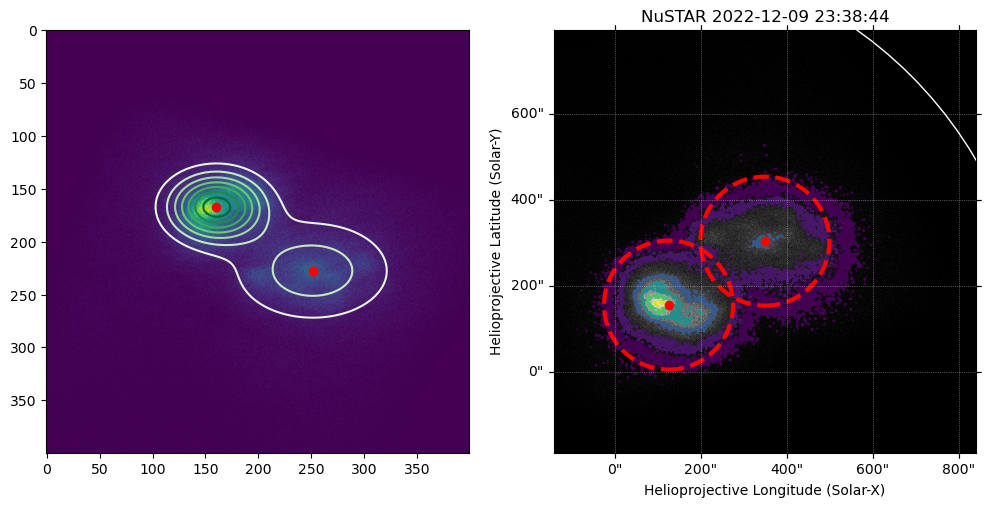

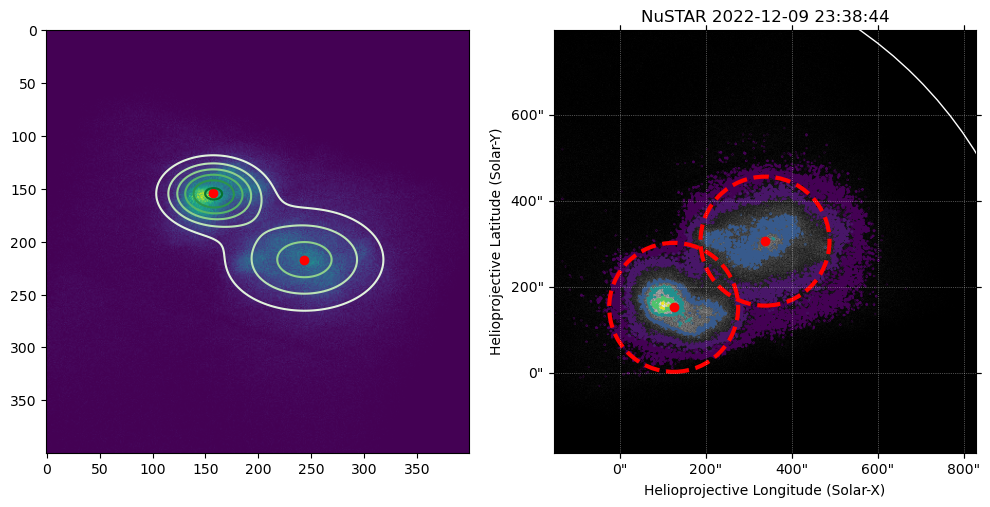

In [30]:
#Double gaussian cases: preparing for time interval selection. 

double_keys = ['30-jul-21_1', '09-dec-22']

ana.double_gauss_prep('30-jul-21_1', all_targets_file_wnew, plot=False, guess=[175,175], guess2=[225,250], 
                      sep_axis='EW', #plotregion=regions, 
                       plotgaussregions=True, write_regions=False)

# ana.double_gauss_prep('20-jul-21', all_targets_file, plot=False, guess=[125,225], #guess2=[225,250], 
#                       sep_axis='SN', #plotregion=regions, 
#                       plotgaussregions=True, write_regions=False)


ana.double_gauss_prep('09-dec-22', all_targets_file_wnew, plot=True, sep_axis='EW', #guess=[175,175], guess2=[225,250], sep_axis='EW', #plotregion=regions, 
                      plotgaussregions=True, write_regions=True, make_scripts=True)


In [31]:
#Single gaussian cases: preparing for time interval selection. 

#'19-feb-16', 
# '11-sep-17', 
#'30-jan-20', 
 #'21-nov-21', 
#'27-feb-22',
#'10-dec-22',
#'18-mar-23_1','18-mar-23_2']

fit_keys = ['19-feb-16',
            '22-apr-16_1', '22-apr-16_2',
           '29-may-18_1', '09-sep-18', '10-sep-18', 
           '12-apr-19', '13-apr-19',
           '29-jan-20',  
           '06-jun-20', '07-jun-20', '08-jun-20', '09-jun-20', 
           '08-jan-21', '20-jan-21', 
           '29-apr-21', '03-may-21_1', '03-may-21_2', #'07-may-21', 
           '30-jul-21_2',
           '17-nov-21_1',
            '22-nov-21_1', '22-nov-21_2',
           '03-jun-22_1',
           '06-sep-22']



importlib.reload(ana)

for k in fit_keys:
   ana.single_gauss_prep(k, all_targets_file_wnew, plot=False)

Percent of data in region:  0.6720226177703812
Percent of data in region:  0.6810506947749672
Percent of data in region:  0.7748728784940323
Percent of data in region:  0.7725034232350714
Percent of data in region:  0.6649771925370129
Percent of data in region:  0.6675574003237388
Percent of data in region:  0.6158404603789365
Percent of data in region:  0.6053925459256984
Percent of data in region:  0.5642781138844131
Percent of data in region:  0.4692684559869696
Percent of data in region:  0.584577747722662
Percent of data in region:  0.5648360870269664
Percent of data in region:  0.6417774866251774
Percent of data in region:  0.6595166601722176
Percent of data in region:  0.6070865276942743
Percent of data in region:  0.6489547689667328
Percent of data in region:  0.6339819360778847
Percent of data in region:  0.6319374605006457
Percent of data in region:  0.6355431579461669
Percent of data in region:  0.6497717690089256
Percent of data in region:  0.842225385729513
Percent of data

In [32]:
#For all manual input cases, adding information from saved region files to dictionary.

with open(all_targets_file_wnew, 'rb') as f:
    data = pickle.load(f)
    

all_keys = data.keys()


import glob
import region_fitting as rf
import nustar_utilities as nuutil
from astropy.io import fits

manual_keys = []
for kk in all_keys:
    if data[kk]['method'] == 'input':
        manual_keys.append(kk)
        regions_list=[]
        for regionnumber in [0,1,2]:
            #print('')
            files = glob.glob(data[kk]['working_dir']+'*A*'+str(regionnumber)+'.reg')
            files.sort()
            if files:
                f=0
                evtfile=glob.glob(data[kk]['datapaths'][f]+'/event_cl/nu*A06_cl_sunpos.evt')[0]
                #print(evtfile)
                with fits.open(evtfile) as hdu:
                    hdr = hdu[1].header
                time0 = nuutil.convert_nustar_time(hdr['TSTART'])
                time1 = nuutil.convert_nustar_time(hdr['TSTOP'])
                offset, rad = rf.read_regfile(files[f], time0, time1, 'hourangle')
                regions_list.append({'centerx': offset[0].round(0).value, 
                                     'centery': offset[1].round(0).value, 
                                     'radius': rad.value
                                    })

        data[kk]['Region Coordinates'] = regions_list


with open(all_targets_file_wnew, 'wb') as f:
     # Pickle the 'data' dictionary using the highest protocol available.
     pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)   


In [33]:
with open(all_targets_file_wnew, 'rb') as f:
    all_targets = pickle.load(f)

In [34]:
#For manual input regions: preparing for time interval selection


#'01-sep-15', '02-sep-15',
 #'12-sep-17', '13-sep-17',
#'24-feb-22', '25-feb-22',
#'28-dec-23', '29-dec-23']
#'17-nov-21_2',
#'11-dec-22_1', '11-dec-22_2'


manual_keys = ['26-jul-16_1', '27-jul-16_1', '26-jul-16_2', 
                '10-oct-17', 
               '29-may-18_2',
               '14-jan-21',
               '19-nov-21',
               '20-nov-21',
               '03-jun-22_2']

for mk in manual_keys:
    print(mk)
    regions = all_targets[mk]['Region Coordinates']
    print(regions)
    ana.manual_prep(mk, all_targets_file_wnew,
                    plot=False, 
                    make_scripts=True,
                    inputregion=regions, write_input_regions=True)


26-jul-16_1
[{'centerx': 1000.0, 'centery': -220.0, 'radius': 150.0}, {'centerx': 1000.0, 'centery': 200.0, 'radius': 150.0}]
centers: [244.4249933461459, 296.2307147821853] [239.77125476875204, 277.417452200449]
Percent of data in region 0:  0.6008079662029456
Percent of data in region 1:  0.20011431862233167
     message: The maximum number of function evaluations is exceeded.
     success: False
      status: 0
         fun: [ 5.265e-68  7.160e-68 ...  2.656e-99  1.929e-99]
           x: [ 2.158e+02  2.646e+02  2.937e+02  1.744e+01  3.088e+01
                2.181e+02  2.624e+02  2.808e+02  1.133e+01  1.126e+01]
        cost: 8927095.915396957
         jac: [[ 2.440e-70 -4.579e-68 ...  0.000e+00  0.000e+00]
               [ 3.318e-70 -6.227e-68 ...  0.000e+00  0.000e+00]
               ...
               [ 1.231e-101  2.920e-99 ...  0.000e+00  0.000e+00]
               [ 8.940e-102  2.121e-99 ...  0.000e+00  0.000e+00]]
        grad: [-3.339e+04 -1.021e+03  5.647e+02  1.708e+02  9.1

In [35]:
all_prep_keys = double_keys + manual_keys + fit_keys
all_prep_keys.sort()
print(all_prep_keys)

dkeys = list(all_targets.keys())
print('')
dkeys.sort()
print(dkeys)

print('')

for i in double_keys:
    print(i, all_targets[i]['method'])

print('')

for i in fit_keys:
    print(i, all_targets[i]['method'])

print('')

for i in manual_keys:
    print(i, all_targets[i]['method'])

['03-jun-22_1', '03-jun-22_2', '03-may-21_1', '03-may-21_2', '06-jun-20', '06-sep-22', '07-jun-20', '08-jan-21', '08-jun-20', '09-dec-22', '09-jun-20', '09-sep-18', '10-oct-17', '10-sep-18', '12-apr-19', '13-apr-19', '14-jan-21', '17-nov-21_1', '19-feb-16', '19-nov-21', '20-jan-21', '20-nov-21', '22-apr-16_1', '22-apr-16_2', '22-nov-21_1', '22-nov-21_2', '26-jul-16_1', '26-jul-16_2', '27-jul-16_1', '29-apr-21', '29-jan-20', '29-may-18_1', '29-may-18_2', '30-jul-21_1', '30-jul-21_2']

['03-jun-22_1', '03-jun-22_2', '03-may-21_1', '03-may-21_2', '06-jun-20', '06-sep-22', '07-jun-20', '08-jan-21', '08-jun-20', '09-dec-22', '09-jun-20', '09-sep-18', '10-oct-17', '10-sep-18', '12-apr-19', '13-apr-19', '14-jan-21', '17-nov-21_1', '19-feb-16', '19-nov-21', '20-jan-21', '20-nov-21', '22-apr-16_1', '22-apr-16_2', '22-nov-21_1', '22-nov-21_2', '26-jul-16_1', '26-jul-16_2', '27-jul-16_1', '29-apr-21', '29-jan-20', '29-may-18_1', '29-may-18_2', '30-jul-21_1', '30-jul-21_2']

30-jul-21_1 double
09-

Percent of data in region 0:  0.6589094855520465
Percent of data in region 0:  0.6910506395407143
Percent of data in region 0:  0.5984183275678049
Percent of data in region 0:  0.6345114449123698
Percent of data in region 0:  0.321874065048396
Percent of data in region 0:  0.4485165421908294
Percent of data in region 0:  0.2802172696754942
Percent of data in region 0:  0.4027634633204987


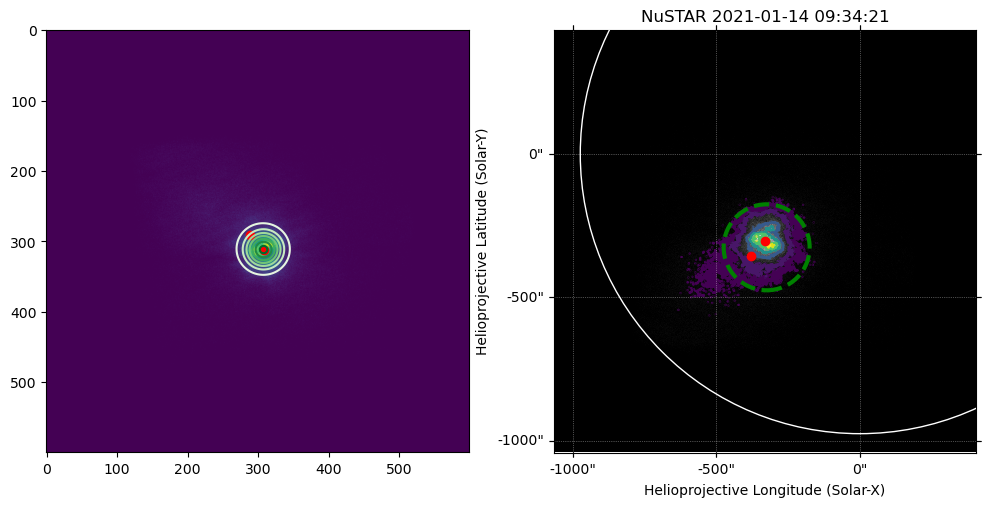

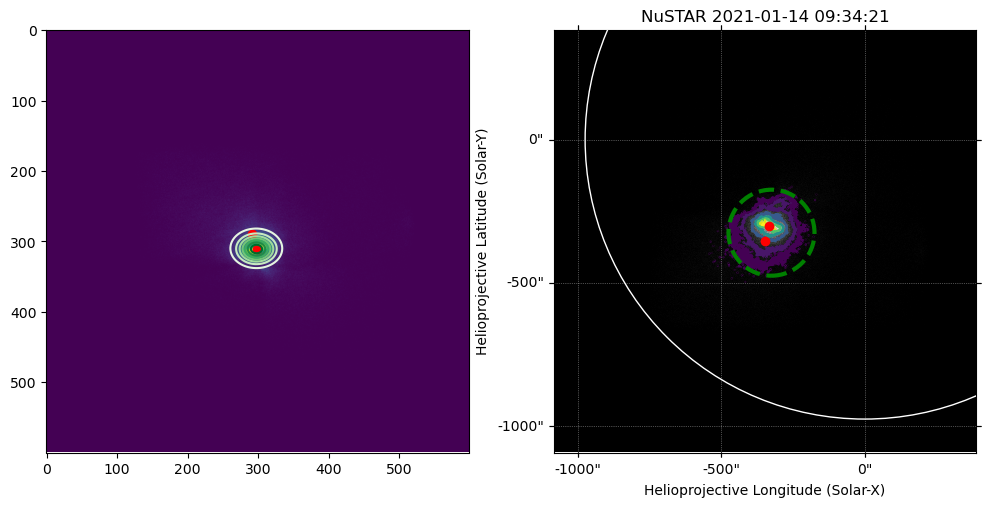

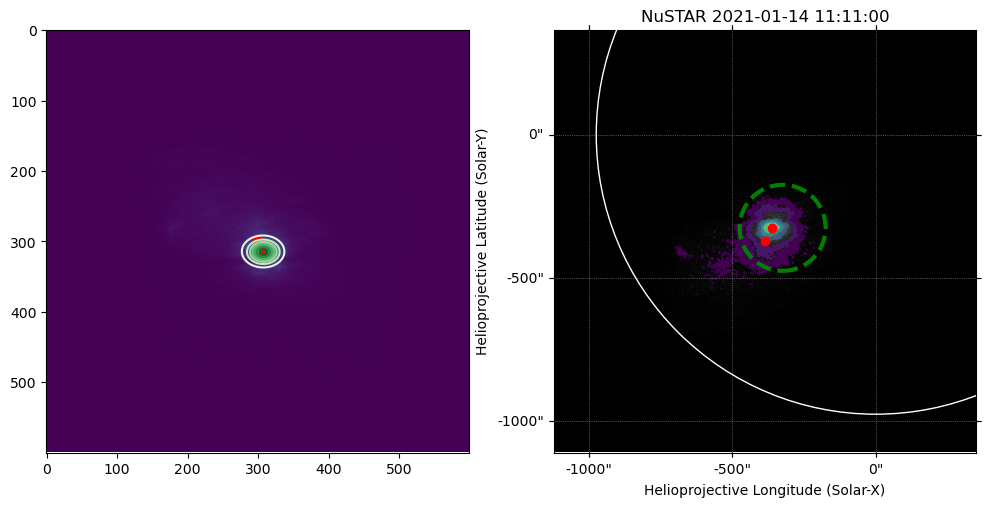

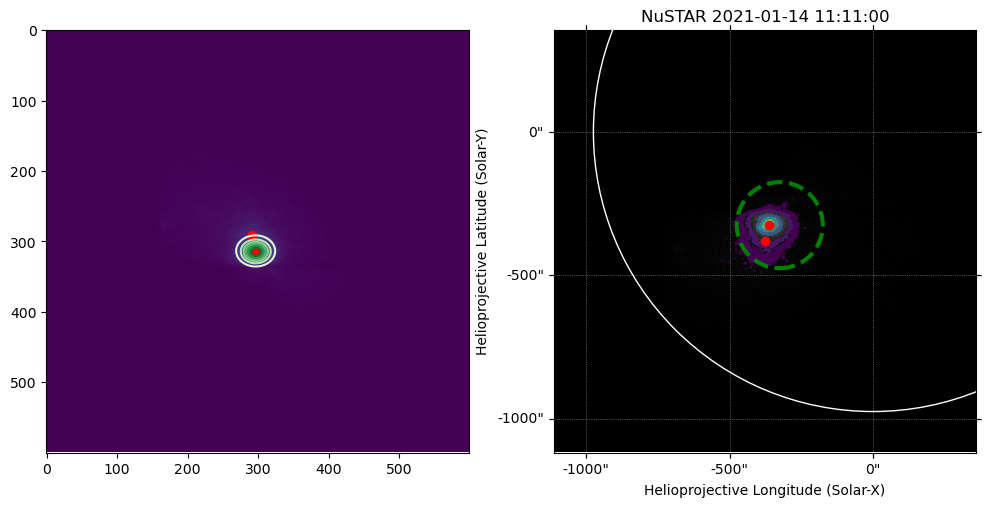

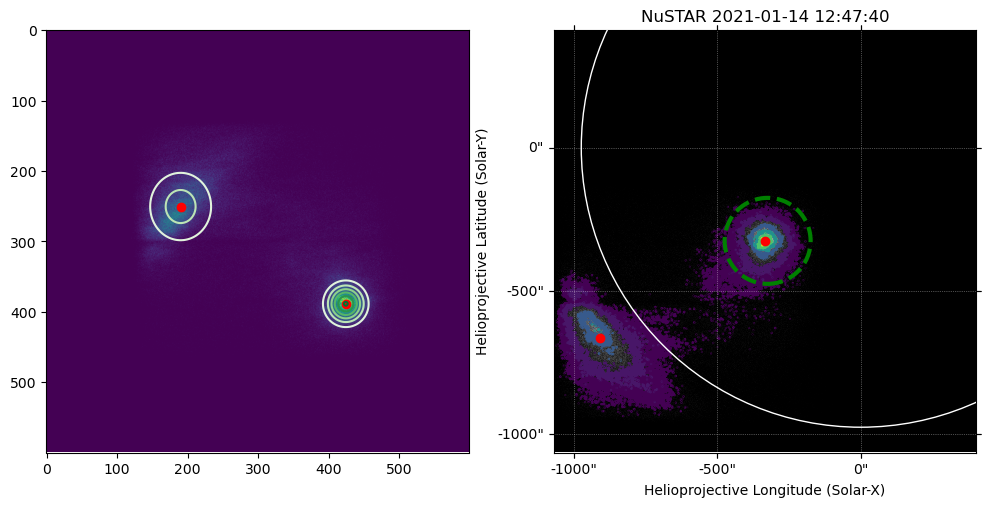

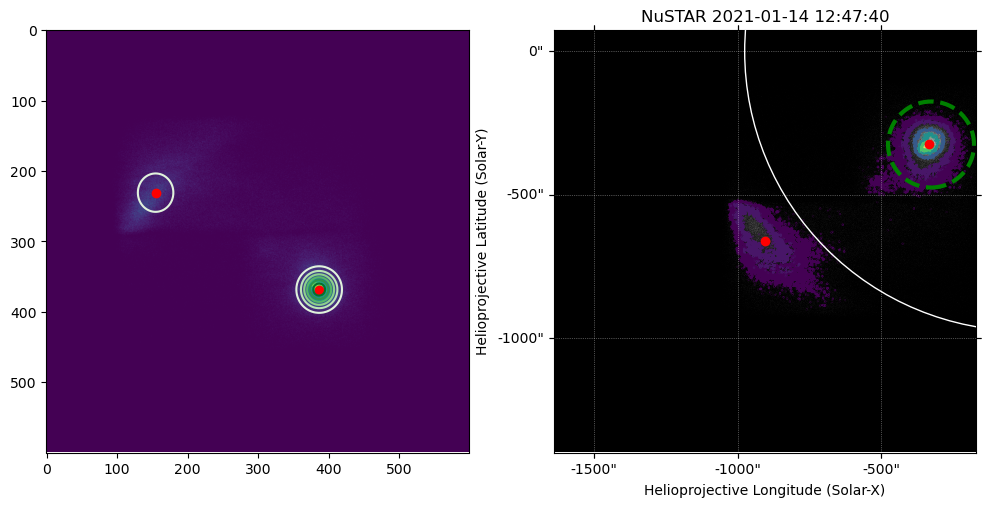

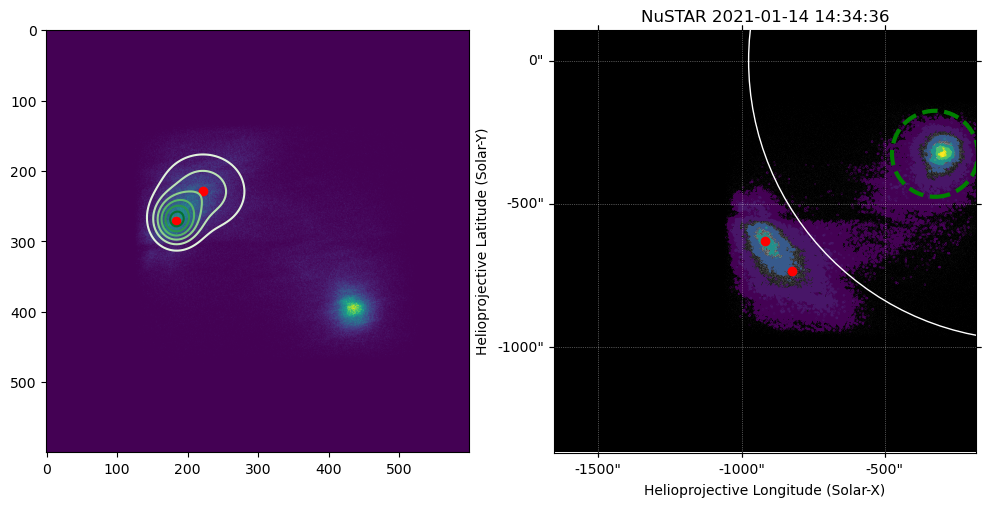

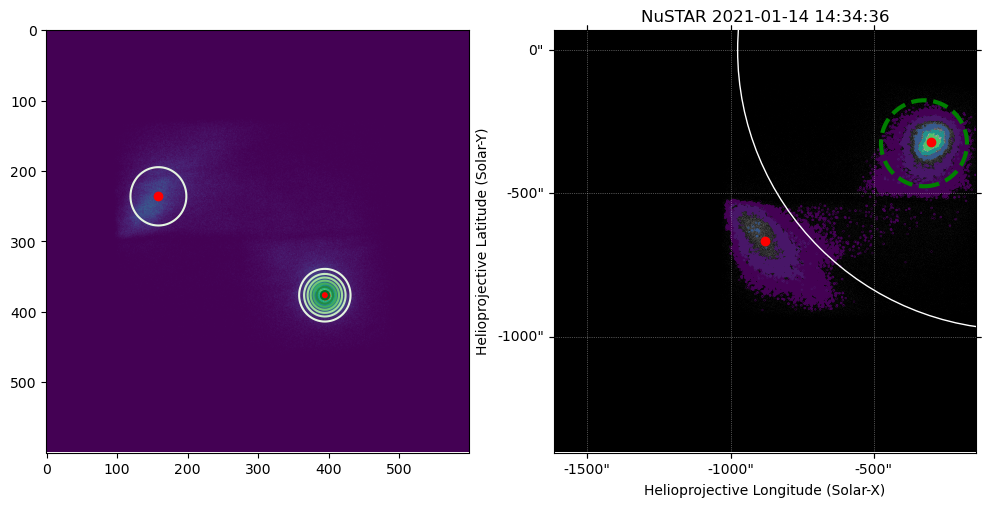

In [31]:
# # #Testbed!

# manual_4_setup = ['14-jan-21']
# #manual_4_setup = ['20-nov-21']

# # #newkeys = ['22-nov-21']

# # #ana.single_gauss_prep(newkeys[0], all_targets_file_wnew, plot=True)

# # #ana.double_gauss_prep(newkeys[0], all_targets_file_wnew, plot=True, sep_axis='EW', #guess=[175,175], guess2=[225,250], sep_axis='EW', #plotregion=regions, 
# # #                      plotgaussregions=True, write_regions=False)

# # #28,29-dec-23
# # # regions = [{'centerx': 650.0, 'centery': 150.0, 'radius': 150.0},
# # #            {'centerx': 950.0, 'centery': 75.0, 'radius': 150.0},
# # #           {'centerx': 1050.0, 'centery': -400.0, 'radius': 150.0}]

# # #11-dec-22_1
# # # regions = [{'centerx': 700.0, 'centery': 400.0, 'radius': 150.0},
# # #            {'centerx': 550.0, 'centery': 200.0, 'radius': 150.0},
# # #           {'centerx': 850.0, 'centery': 200.0, 'radius': 150.0}]

# # #11-dec-22_2
# # #regions = [{'centerx': 950.0, 'centery': -350.0, 'radius': 150.0}]

# # #'03-jun-22_2'
# # #regions = [{'centerx': 900.0, 'centery': 230.0, 'radius': 150.0},
# # #           {'centerx': 420.0, 'centery': -300.0, 'radius': 150.0}
# # #          ]


# #'14-jan-21'
# regions = [{'centerx': -325.0, 'centery': -325.0, 'radius': 150.0}]

# #'20-nov-21'
# #regions = [{'centerx': -420.0, 'centery': 220.0, 'radius': 150.0}]


# mk = manual_4_setup[0]



# #ana.single_gauss_prep(mk, all_targets_file_wnew, plot=True)

# ana.manual_prep(mk, all_targets_file_wnew,
#                     plot=True, 
#                     make_scripts=True,
#                     plotgaussregions=False, 
#                     inputregion=regions, write_input_regions=True)






In [35]:
all_targets.keys()

dict_keys(['19-feb-16', '22-apr-16_1', '22-apr-16_2', '26-jul-16_1', '27-jul-16_1', '26-jul-16_2', '10-oct-17', '29-may-18_1', '29-may-18_2', '09-sep-18', '10-sep-18', '12-apr-19', '13-apr-19', '29-jan-20', '06-jun-20', '07-jun-20', '08-jun-20', '09-jun-20', '08-jan-21', '20-jan-21', '29-apr-21', '03-may-21_1', '03-may-21_2', '07-may-21', '30-jul-21_1', '30-jul-21_2', '17-nov-21_1', '19-nov-21', '20-nov-21', '22-nov-21_1', '22-nov-21_2', '03-jun-22_1', '03-jun-22_2', '06-sep-22', '09-dec-22', '10-dec-22', '14-jan-21'])

In [36]:
"""
Key sorting!

"""

#Potential or clear ghost ray issues

gri = ['01-sep-15', '02-sep-15', 
       '11-sep-17', '12-sep-17', '13-sep-17',
       '30-jan-20',
       '20-jul-21',
       '17-nov-21_2', '21-nov-21', 
       '24-feb-22', '25-feb-22', '27-feb-22',
       '11-dec-22_1', #NO TIS YET, GHOST RAYS ACTUALLY MAY NOT BE TOO BAD IDK
       '11-dec-22_2',
       '18-mar-23_1', '18-mar-23_2',
       '28-dec-23', '29-dec-23' #NO TIS YET, GHOST RAYS ACTUALLY MAY NOT BE TOO BAD IDK

       ]

"""
The above ghost ray intervals will be excluded completely from future analysis, so they aren't included below 
even if they also meet other criteria. 
"""

#No accepted intervals (or no viable ones - e.g. non flaring)

nai = ['07-may-21',  
       '17-nov-21_1',
       '09-dec-22', #has good intervals if you allow times with >90% accepted instead of %95
       '10-dec-22' 
      ]

#No accepted intervals and yeah, good call
nai_fair = ['07-may-21', '10-dec-22'
           ]

#No accepted intervals and seems ok, change our threshold?
nai_holdon = ['17-nov-21_1',
               '09-dec-22'
                ]

"""
The above very high-flux intervals (nai_fair) will be excluded completely from future analysis, so they aren't 
included below either.
"""


newbies = ['17-nov-21_1', '03-jun-22_1', '06-sep-22', '19-nov-21', '20-nov-21', '22-nov-21_1', '22-nov-21_2',
          '03-jun-22_2', '09-dec-22']



list_A = ['22-apr-16_1', '22-apr-16_2', '26-jul-16_1', '27-jul-16_1', '26-jul-16_2', 
          '10-oct-17', 
          '29-may-18_1', '09-sep-18', '10-sep-18', 
          '12-apr-19', '13-apr-19',
          '29-jan-20', '06-jun-20', '07-jun-20', '08-jun-20', '09-jun-20',
          '08-jan-21', '14-jan-21', '20-jan-21', '29-apr-21', '03-may-21_1', '17-nov-21_1',
          '03-jun-22_1', '06-sep-22']
          

]

list_B = ['19-feb-16', '29-may-18_2', 
          '03-may-21_2', '30-jul-21_1', '30-jul-21_2',
          '19-nov-21', '20-nov-21', '22-nov-21_1', '22-nov-21_2',
          '03-jun-22_2', '09-dec-22']
          


    
#Fail TIS

ftis = ['22-apr-16_1', '22-nov-21_2'
       ]


#No non-flaring times with sufficient statistics

flareonly = ['17-nov-21_1', '03-jun-22_1', 
            ]

#Perfect angel children with no problems

pacwnp = ['22-apr-16_2', 
          '26-jul-16_1','27-jul-16_1', '26-jul-16_2',
          '10-oct-17', 
          '29-may-18_1', '29-may-18_2',
          '09-sep-18', '10-sep-18',
          '12-apr-19', '13-apr-19',
          '29-jan-20',
          '06-jun-20', '07-jun-20', '08-jun-20', '09-jun-20',
          '08-jan-21', '20-jan-21', 
          '29-apr-21', '03-may-21_1', '03-may-21_2',
           '30-jul-21_1',
          #'17-nov-21_1', #NO TIS YET
          '06-sep-22'
          
            ]

pacwnp_sources = {k: all_targets[k] for k in pacwnp}
ana.get_exposures(pacwnp_sources, dogoes=False)

gri_sources = {k: all_targets[k] for k in gri}
ana.get_exposures(gri_sources, dogoes=False)

19-feb-16
Duration:  191.92 min | Effective Exposure:  3.17 min | Livetime %:  0.02
22-apr-16_2
Duration:  211.42 min | Effective Exposure:  12.47 min | Livetime %:  0.06
26-jul-16_1
Duration:  139.65 min | Effective Exposure:  7.2 min | Livetime %:  0.05
27-jul-16_1
Duration:  60.47 min | Effective Exposure:  2.65 min | Livetime %:  0.04
26-jul-16_2
Duration:  9.9 min | Effective Exposure:  0.43 min | Livetime %:  0.04
10-oct-17
Duration:  145.27 min | Effective Exposure:  3.93 min | Livetime %:  0.03
29-may-18_1
Duration:  263.82 min | Effective Exposure:  5.97 min | Livetime %:  0.02
29-may-18_2
Duration:  20.88 min | Effective Exposure:  2.42 min | Livetime %:  0.12
09-sep-18
Duration:  179.25 min | Effective Exposure:  21.62 min | Livetime %:  0.12
10-sep-18
Duration:  179.27 min | Effective Exposure:  22.35 min | Livetime %:  0.12
12-apr-19
Duration:  273.88 min | Effective Exposure:  4.07 min | Livetime %:  0.01
13-apr-19
Duration:  355.88 min | Effective Exposure:  3.71 min | L

In [31]:
area_i = 100**2
area_m = np.pi*150**2
#print(area_i, area_m)
factor = area_m/area_i
factor

7.068583470577035

In [34]:
# all_keys = all_targets.keys()

# print('All: ', len(all_keys))

# fit_tis = ['19-feb-16', '22-apr-16_1', '22-apr-16_2',
#            '11-sep-17', 
#            '29-may-18_1', '09-sep-18', '10-sep-18', 
#            '12-apr-19', '13-apr-19',
#            '29-jan-20', #'30-jan-20', 
#            '06-jun-20', '07-jun-20', '08-jun-20', '09-jun-20', 
#            '08-jan-21', '20-jan-21', 
#            '29-apr-21', '03-may-21_1', '03-may-21_2', '07-may-21', 
#            '30-jul-21_2',
#            '03-jun-22', 
#            '06-sep-22']


# input_tis = ['01-sep-15', '02-sep-15', 
#              '26-jul-16_1', '26-jul-16_2', '27-jul-16_1', 
#              '12-sep-17', '13-sep-17', '10-oct-17']

# double_tis = ['20-jul-21', '30-jul-21_1']

# no_tis_attempt = ['29-may-18_2']

# print('Fit TIS: ', len(fit_tis), ' | Input TIS: ', len(input_tis), ' | Double TIS: ', len(double_tis), ' | No TIS yet: ', len(no_tis_attempt),\
#       ' | Total: ', len(fit_tis)+len(input_tis)+len(double_tis)+len(no_tis_attempt))



# done_dems = ['01-sep-15', '02-sep-15',
#         '19-feb-16', '22-apr-16_2', '26-jul-16_1', '27-jul-16_1', '26-jul-16_2',
#         '11-sep-17', '12-sep-17', '13-sep-17', '10-oct-17',
#         '29-may-18_1', '09-sep-18', '10-sep-18', 
#         '12-apr-19', '13-apr-19', 
#         '06-jun-20', '07-jun-20', 
#         '08-jun-20', '09-jun-20',
#         '29-apr-21', '03-may-21_1', '03-may-21_2', '20-jul-21', 
#         '30-jul-21_1', 
#         '30-jul-21_2']

# print('All Done: ', len(done_dems))


# donedems_fit = ['19-feb-16', '22-apr-16_2',
#                 '11-sep-17',
#              '29-may-18_1', '09-sep-18', '10-sep-18', 
#         '12-apr-19', '13-apr-19', 
#         '06-jun-20', '07-jun-20', 
#         '08-jun-20', '09-jun-20',
#         '29-apr-21', '03-may-21_1', '03-may-21_2','30-jul-21_2']

# donedems_input = ['01-sep-15', '02-sep-15',
#             '26-jul-16_1', '27-jul-16_1', '26-jul-16_2',
#              '12-sep-17', '13-sep-17', '10-oct-17'
#             ]

# donedems_double = ['20-jul-21', '30-jul-21_1']



# print('Done fit: ', len(donedems_fit), ' | Done input: ', len(donedems_input), ' | Done double: ', len(donedems_double), ' | Done Total: ', len(donedems_fit)+len(donedems_input)+len(donedems_double))


# failed_tis = ['22-apr-16_1']   
# print('Failed TIS: ', len(failed_tis))

# in_progress = []

# missing_aia = [#'19-feb-16', ONlY MISSING ORBIT 4, SO STILL DID THE OTHER 3 DEMS. TIS results are in "orbit 4" directory.
#                '29-may-18_2',
#                '29-jan-20', #12 - MISSING AIA
#                 #'30-jan-20', #13 - MISSING AIA
#                  '08-jan-21',   #FIRST ORBIT MISSING AIA
#                 '20-jan-21', #15 - MISSING AIA
#                 '07-may-21', #16 - Single source; missing AIA data for one of two orbits. 
               
#                 ]

# print('Missing AIA: ', len(missing_aia))
# print('Done + Missing AIA + In-progress + Failed TIS: ', len(missing_aia)+len(done_dems)+len(in_progress)+len(failed_tis))
# print('')
      
# print('Exposure (done so far):')

# #with open('all_targets.pickle', 'rb') as f:
# #    all_targets = pickle.load(f)
    
# single_sources = {k: all_targets[k] for k in done_dems}
# ana.get_exposures(single_sources, dogoes=False)

# print('')

# # print('Exposure (missing_aia):')
    
# # single_sources = {k: all_targets[k] for k in missing_aia}
# # ana.get_exposures(single_sources, dogoes=False)

# # print('')

# print('Exposure (working on it):')
    
# single_sources = {k: all_targets[k] for k in in_progress}
# ana.get_exposures(single_sources, dogoes=False)

# print('')

# print('Exposure (failed TIS):')
    
# single_sources = {k: all_targets[k] for k in failed_tis}
# ana.get_exposures(single_sources, dogoes=False)      



All:  37
Fit TIS:  23  | Input TIS:  8  | Double TIS:  2  | No TIS yet:  1  | Total:  34
All Done:  26
Done fit:  16  | Done input:  8  | Done double:  2  | Done Total:  26
Failed TIS:  1
Missing AIA:  5
Done + Missing AIA + In-progress + Failed TIS:  32

Exposure (done so far):
01-sep-15
Duration:  172.42 min | Effective Exposure:  3.01 min | Livetime %:  0.02
02-sep-15
Duration:  238.83 min | Effective Exposure:  5.27 min | Livetime %:  0.02
19-feb-16
Duration:  191.83 min | Effective Exposure:  4.26 min | Livetime %:  0.02
22-apr-16_2
Duration:  211.42 min | Effective Exposure:  15.91 min | Livetime %:  0.08
26-jul-16_1
Duration:  139.65 min | Effective Exposure:  7.63 min | Livetime %:  0.05
27-jul-16_1
Duration:  60.47 min | Effective Exposure:  2.35 min | Livetime %:  0.04
26-jul-16_2
Duration:  9.9 min | Effective Exposure:  0.53 min | Livetime %:  0.05
11-sep-17
Duration:  229.05 min | Effective Exposure:  1.19 min | Livetime %:  0.01
12-sep-17
Duration:  106.08 min | Effective

In [25]:
# limbs=0
# disks=0
# HARPS=[]
# for k in all_targets.keys():
#     dict=all_targets[k]
#     for h in range(0, len(dict['HARP'])):
#         hh = dict['HARP'][h]
#         if hh not in HARPS:
#             HARPS.append(hh)
#             x=dict['loc'][h]
#             if x=='limb':
#                 limbs+=1
#             elif x=='disk':
#                 disks+=1
#             else:
#                 print('n', x)
                
# print(disks, limbs, len(all_targets.keys()) )  
# print(HARPS)
# print(len(HARPS))

12 19 37
[5930, 5894, 6327, 6500, 6483, 6681, 6683, 6687, 7115, 7148, 7147, 7262, 7261, 7260, 7304, 7353, 7405, 7422, 0, 7536, 7573, 7579, 7580, 7581, 7674, 7675, 7673, 8032, 8013, 8285, 8546]
31


In [ ]:
single_sources = {k: all_targets[k] for k in initial_single_source_keys}
ana.get_exposures(single_sources, dogoes=False)

In [ ]:
problem_sources = {k: all_targets[k] for k in problem_kids}
ana.get_exposures(problem_sources, dogoes=False)

In [ ]:
double_sources = {k: all_targets[k] for k in ideal_twosource}
ana.get_exposures(double_sources, dogoes=False)